In [ ]:
# This is the code for Louvain and Directed Louvain for detecting communities. 
# Input : Graph G (V,E) and a directed graph G(V,E)
# Output : Communities detected by Louvain and Directed Louvain as set of nodes in each community


In [2]:
#Create a graph using networkx
import networkx as nx
import matplotlib.pyplot as plt

#print networkx version
print(nx.__version__)

3.3


# Very simple examples

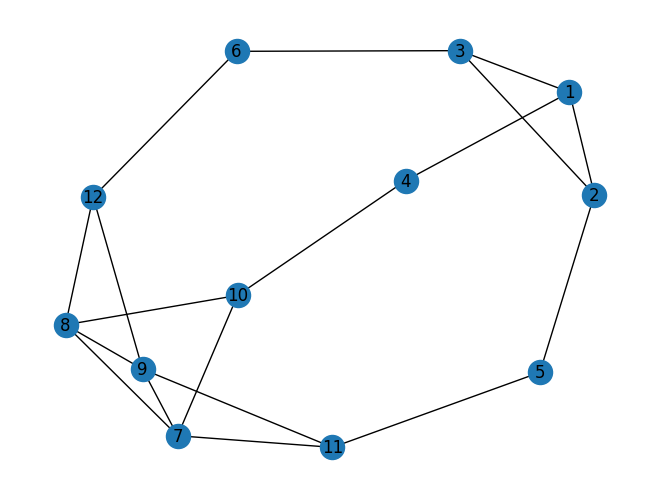

In [7]:
G = nx.Graph()
#For simplicity, two communities with 6 nodes each (3 cores, 3 peripheries)
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12]) #1,2,3 7,8,9 are cores / 4,5,6 10,11,12 are peripheries
#Each node has 2 out-degrees, cores only connected to cores, peripheries connected to cores and another community's peripheries
G.add_edges_from([(1,2),(1,3),(2,3),(2,1),(3,1),(3,2),(4,10),(4,1),(5,2),(5,11),(6,3),(6,12),(7,8),(7,9),(8,9),(8,7),(9,7),(9,8),(10,7),(10,8),(11,7),(11,9),(12,8),(12,9)])
#visuallize G
nx.draw(G, with_labels=True)


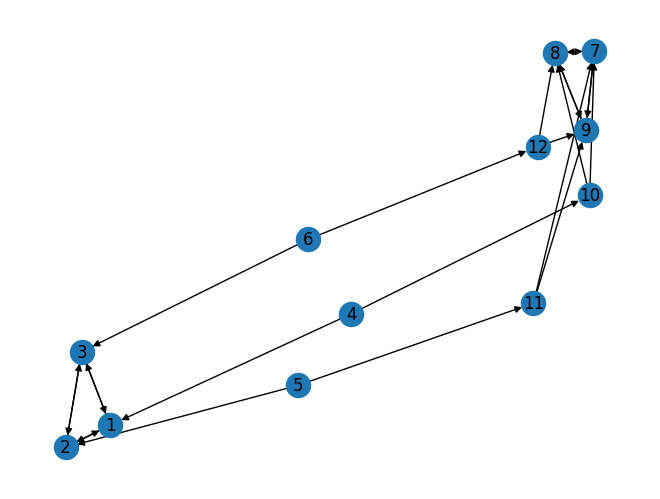

In [8]:
#Directed graph
DG = nx.DiGraph()
DG.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11,12])
DG.add_edges_from([(1,2),(1,3),(2,3),(2,1),(3,1),(3,2),(4,10),(4,1),(5,2),(5,11),(6,3),(6,12),(7,8),(7,9),(8,9),(8,7),(9,7),(9,8),(10,7),(10,8),(11,7),(11,9),(12,8),(12,9)])
#visualize DG
nx.draw(DG, with_labels=True)

In [47]:
#Run louvain on both graphs
nx.community.louvain_communities(G, seed = 1)
print("Louvain communities for G: ", nx.community.louvain_communities(G, seed = 1))
nx.community.louvain_communities(DG, seed = 1)
print("Louvain communities for DG: ", nx.community.louvain_communities(DG, seed = 1))

Louvain communities for G:  [{1, 2, 3, 4}, {11, 5}, {12, 6}, {8, 9, 10, 7}]
Louvain communities for DG:  [{1, 2, 3}, {12, 6}, {11, 5}, {8, 9, 7}, {10, 4}]


# Karate-Club graph

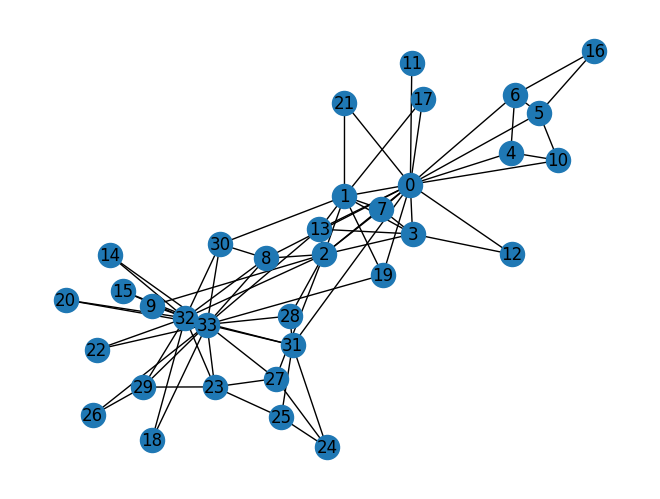

In [71]:
#Example graph
G_ex = nx.karate_club_graph()
nx.draw(G_ex, with_labels=True)

In [73]:
Res = nx.community.louvain_partitions(G_ex, seed = 1)
# Resolution and threshold parameters can be set as well (default resolution = 1.0, threshold = 0.0001)
#Res = nx.community.louvain_partitions(G_ex, seed = 1, resolution = 1.0, threshold=0.0001) 
#Resolution = weight to the penalty, threshold = minimum modularity improvement to continue partitioning

# Louvain_partitions show intermediate steps as well
for i, s in enumerate(Res, start=1):
    print(f"Set {i}: {s}")

#Louvain_communities show the final communities
Res_G = nx.community.louvain_communities(G_ex, seed = 1)
print(Res_G)


Set 1: [{0, 17, 19, 21, 11}, {1, 2, 3, 7, 12, 13}, {10, 4}, {16, 5, 6}, {8, 30}, {24, 25, 28, 31}, {32, 20, 23, 26, 29, 14}, {33, 18, 22, 9, 27, 15}]
Set 2: [{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, {16, 4, 5, 6, 10}, {24, 25, 28, 31}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30}]
[{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, {16, 4, 5, 6, 10}, {24, 25, 28, 31}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30}]


# Random Graph with High concentrated communities

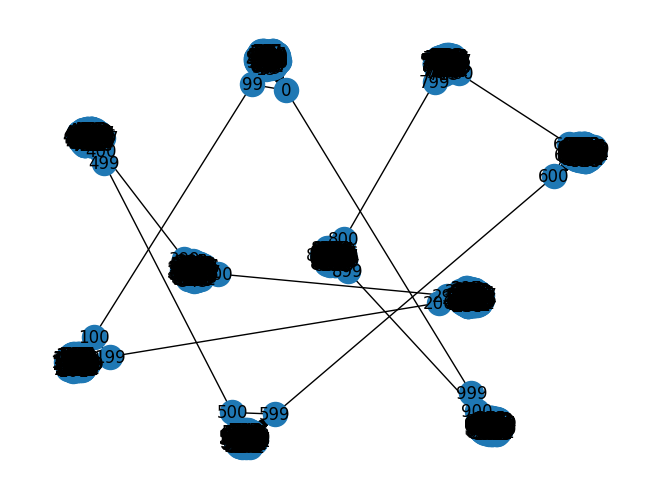

In [74]:
#Random graph with communities
G_rand = nx.connected_caveman_graph(10, 100) #10 cliques of 100 nodes each
nx.draw(G_rand, with_labels=True)

In [75]:
#Louvain Community and Louvain Partition
Res_G_rand = nx.community.louvain_communities(G_rand, seed = 1)
print(Res_G_rand)
Res_G_rand = nx.community.louvain_partitions(G_rand, seed = 1)
for i, s in enumerate(Res_G_rand, start=1):
    print(f"Set {i}: {s}")
    

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}, {100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199}, {256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,